
Complete the code in the blocks below. Do not alter blocks that indicate that they should not be changed.

Look for blocks that say "FILL IN THIS SECTION"

FILL IN THIS SECTION

Author(s):

In this homework we will write a program to play a game called **Dots and Boxes**. The rules for this game are:

*The game starts with an empty grid of dots. Usually two players take turns adding a single horizontal or vertical line between two unjoined adjacent dots. A player who completes the fourth side of a 1×1 box earns one point and takes another turn. A point is typically recorded by placing a mark that identifies the player in the box, such as an initial. The game ends when no more lines can be placed. The winner is the player with the most points.*

You can read more about this game [here](https://en.wikipedia.org/wiki/Dots_and_boxes). Try to understand the strategy of the game before you start coding.

**We are playing a modified version of Dots and Boxes that does not repeat turns after scoring. This makes the coding easier.**

In [13]:
#@title Imports
import matplotlib.pyplot as plt
from random import randint

In [12]:
#@title Line Class
# Define a class representing on line on a Dots and Boxes board
# Do Not Change!

class Line:
  def __init__(self, start: tuple, end: tuple) -> None:
    self.start = start
    self.end = end

  def __len__(self) -> int:
    return (self.end[0] - self.start[0]) +  (self.end[1] - self.start[1])

  def __hash__(self):
    return hash(self.start) ^ hash(self.end)

  def __eq__(self, other):
    return self.start[0] == other.start[0] and \
      self.start[1] == other.start[1] and \
      self.end[0] == other.end[0] and \
      self.end[1] == other.end[1]

Player 1 score: 0
Player 2 score: 0


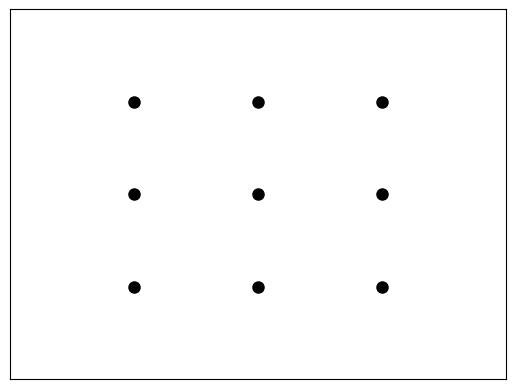

In [11]:
#@title Dots_and_Boxes Class
# Define a Dots and Boxes Class
# Do Not Change!

class Dots_and_Boxes:
  """
  A class representing an arbitrary sized game of Dots and Boxes

  Attributes:
    num_rows              the number of box rows (1 less than dot rows)
    num_cols              the number of box columns (1 less than dot cols)
    p1_lines              lines played by Player 1 so far
    p2_lines              lines played by Player 2 so far
    max                   the max number of lines that fit on the board

    Methods:
    init                  constructor
    draw_dots_and_boxes   draw the board
    p1_place              place a line for player 1
    p2_place              place a line for player 2
    print_p1_score        print the score for player 1
    print_p2_score        print the score for player 2
    is_full               true if the board is full, false otherwise
  """
  def __init__(self, num_rows=2, num_cols=2):
    self.num_rows = num_rows
    self.num_cols = num_cols
    self.p1_lines = set()
    self.p2_lines = set()
    self.max = 4*sum(list(range(1, num_rows+1)))

  def draw_dots_and_boxes(self):
      fig, ax = plt.subplots()
      for i in range(self.num_rows + 1):
          for j in range(self.num_cols + 1):
              ax.plot(j, i, 'ko', markersize=8)

      # # Plot Player 1 Lines in Blue
      for line in self.p1_lines:
        ax.plot([line.start[0], line.end[0]],
         [line.start[1], line.end[1]], c='blue')

      # # Plot Player 2 Lines in Blue
      for line in self.p2_lines:
        ax.plot([line.start[0], line.end[0]],
         [line.start[1], line.end[1]], c='red')

      # Set axis limits and remove ticks
      ax.set_xlim(-1, self.num_cols + 1)
      ax.set_ylim(-1, self.num_rows + 1)
      ax.set_xticks([])
      ax.set_yticks([])

      # Show the plot
      plt.show()

  def p1_place(self, m: Line) -> None:
    assert len(m) == 1, "Line is too long or too short"
    assert m not in self.p1_lines and m not in self.p2_lines, "Move already played"
    self.p1_lines.add(m)

  def p2_place(self, m: Line) -> None:
    assert len(m) == 1, "Line is too long or too short"
    assert m not in self.p1_lines and m not in self.p2_lines, "Move already played"
    self.p2_lines.add(m)

  def print_p1_score(self) -> None:
    score = 0
    for row in range(self.num_rows):
      for col in range(self.num_cols):
        if Line((row, col), (row, col+1)) in self.p1_lines and \
          Line((row+1, col), (row+1, col+1)) in self.p1_lines and \
          Line((row, col), (row+1, col)) in self.p1_lines and \
          Line((row, col+1), (row+1, col+1)) in self.p1_lines:
            score += 1
    print(f'Player 1 score: {score}')

  def print_p2_score(self) -> None:
    score = 0
    for row in range(self.num_rows):
      for col in range(self.num_cols):
        if Line((row, col), (row, col+1)) in self.p2_lines and \
          Line((row+1, col), (row+1, col+1)) in self.p2_lines and \
          Line((row, col), (row+1, col)) in self.p2_lines and \
          Line((row, col+1), (row+1, col+1)) in self.p2_lines:
            score += 1
    print(f'Player 2 score: {score}')

  def is_full(self):
    return len(self.p1_lines) + len(self.p2_lines) >= self.max

# Example usage: 3x3 Dots and Boxes board
board = Dots_and_Boxes(2, 2)
board.print_p1_score()
board.print_p2_score()
board.draw_dots_and_boxes()
del board

**FILL IN THIS SECTION**

ANSWER THE QUESTION BELOW BY TYPING IN THIS BOX.

How would you evaluate a Dots and Boxes board? What can you look for that indicates you are close to winning?

In [4]:
# FILL IN THIS SECTION

def evaluate(b: Dots_and_Boxes) -> float:
  """
  Implement your strategy to evaluate a Dots and Boxes board.
  You should do some reading to understand the strategy of Dots and Boxes.
  Assume that you are the Max player, so bigger is better.
  Consider that the board might be in a terminal state.
  """
  return 0.0

In [5]:
# Define a function to select Player 1's move
# This bot picks a random, legal move
# Do Not Change!

def pick_p1_move(b: Dots_and_Boxes) -> Line:
  move = Line((0,0), (0,1))
  while move in b.p1_lines or move in b.p2_lines:
    if randint(0,1) == 0: #place vertical line
      row = randint(0, b.num_rows)
      col = randint(0, b.num_cols-1)
      move = Line((row, col), (row, col+1))
    else:                 #place horizontal line
      row = randint(0, b.num_rows-1)
      col = randint(0, b.num_cols)
      move = Line((row, col), (row+1, col))
  return move


In [6]:
# FILL IN THIS SECTION

def pick_p2_move(b: Dots_and_Boxes) -> Line:
  """
  Implement the minimax adverserial search algorithm.
  You are the Max player. Return the move with the
  highest evaluation.
  """
  return Line(start=(0,0), end=(1,0))

In [14]:
# Play a 2x2 game against a computer opponent.
# Your "pick move" function is playing as Player 2
# Your opponent plays first, but will only choose random moves
# You should be able to beat your opponent
# Only the final board state will be drawn

# Do Not Change!

board = Dots_and_Boxes(2, 2)
while not board.is_full():
  p1_move = pick_p1_move(board)
  board.p1_place(p1_move)
  if board.is_full():
    break
  p2_move = pick_p2_move(board)
  board.p2_place(p2_move)

board.print_p1_score()
board.print_p2_score()
board.draw_dots_and_boxes()

AssertionError: Move already played